In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens')
from importlib import reload
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import default_cosmology
from astropy import units
import astropy
import time

import psutil
from distributed.utils import format_bytes

#only for python3
import importlib
reload=importlib.reload

In [ ]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False

In [2]:
from skylens import *
# from fisher import *
from PCA_shear import *

In [3]:
import PCA_shear
reload(PCA_shear)
from PCA_shear import *

In [4]:
import skylens
reload(skylens)
from skylens import *

In [5]:
import survey_utils
reload(survey_utils)
from survey_utils import *

In [6]:
fig_home='./figures/'
fig_format='pdf'

In [7]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
LC=LocalCluster(n_workers=1,processes=False,memory_limit='60gb',threads_per_worker=8,memory_spill_fraction=.99,
               memory_monitor_interval='2000ms')
client=Client(LC)

In [57]:
fname='../tests/fisher/fisher_5_5_17_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
# fname='../tests/fisher/fisher_2_2_4_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
with open(fname,'rb') as of:
    fishes=pickle.load(of)

In [58]:
fishes.keys()

dict_keys(['priors', 'f0', 'f_nz0', 'f_all', 'f_nz_all', 'f_all_lsst', 'f_nz_all_lsst', 'cov_file', 'cosmo_fid'])

In [59]:
f_nz_all_lsst=fishes['f_nz_all_lsst']
f_nz0=fishes['f_nz0']
f_nz_all=fishes['f_nz_all']


In [60]:
import plot_fisher_tool
reload(plot_fisher_tool)
from plot_fisher_tool import *

In [61]:
f_nz_all_lsst['params'].shape

(514,)

In [62]:
f_nz_all.keys()

dict_keys(['cov_p_inv', 'params_all', 'prior', 'cov_p', 'error', 'cov_deriv', 'model_deriv', 'cov', 'cov_inv', 'model', 'x_vars', 'params'])

In [63]:
x=np.isfinite(f_nz_all['cov'])
x.mean()

0.9476063131186113

In [64]:
fishes.keys()

dict_keys(['priors', 'f0', 'f_nz0', 'f_all', 'f_nz_all', 'f_all_lsst', 'f_nz_all_lsst', 'cov_file', 'cosmo_fid'])

In [65]:
f_nz_all['x_vars']['Om']

array([0.304425, 0.310575])

In [66]:
f_nz_all['model']['Om'][0]

array([nan, nan, nan, ..., nan, nan, nan])

In [67]:
f_nz_all['cov'][100:125,100:125]

array([[           nan, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00,            nan, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,            nan, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00,            nan, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,            nan, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00,            nan,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00,            nan, 0.00000000e+00,
        0.0000

In [72]:
np.linalg.inv(np.nan_to_num(f_nz_all['cov']))

LinAlgError: Singular matrix

In [68]:
error=np.sqrt(np.diag(f_nz_all['cov']))
corr=f_nz_all['cov']/np.outer(error,error)

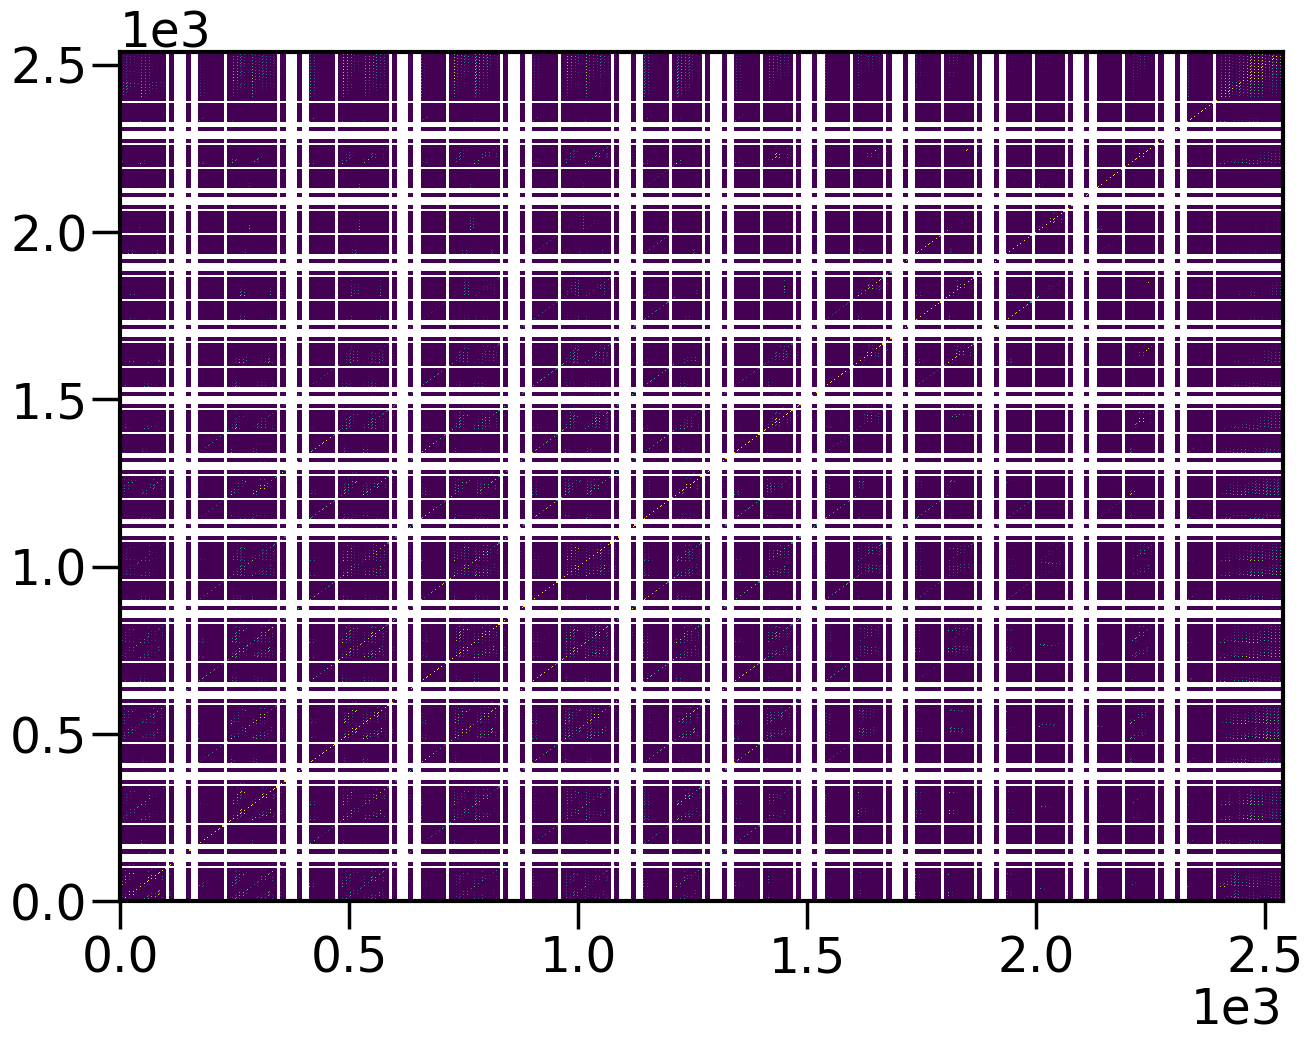

In [69]:
pcolor(corr)#[:200,:200])

In [53]:
for k in f_nz_all['model'].keys():
    print(k,np.any(np.isfinite(f_nz_all['model'][k][0])))

Ase9 False
Om False
w False
wa False
nz_s_0_0 False
nz_s_0_1 False
nz_s_0_2 False
nz_s_0_3 False
nz_s_0_4 False
nz_s_1_0 False
nz_s_1_1 False
nz_s_1_2 False
nz_s_1_3 False
nz_s_1_4 False
nz_l_0_0 False
nz_l_0_1 False
nz_l_0_2 False
nz_l_0_3 False
nz_l_0_4 False
nz_l_1_0 False
nz_l_1_1 False
nz_l_1_2 False
nz_l_1_3 False
nz_l_1_4 False
g_b_s_1_0 False
g_b_s_1_1 False
g_b_l_1_0 False
g_b_l_1_1 False
g_b_l_1_2 False
g_b_l_1_3 False
g_b_l_1_4 False
g_b_l_1_5 False


ValueError: Axis limits cannot be NaN or Inf

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


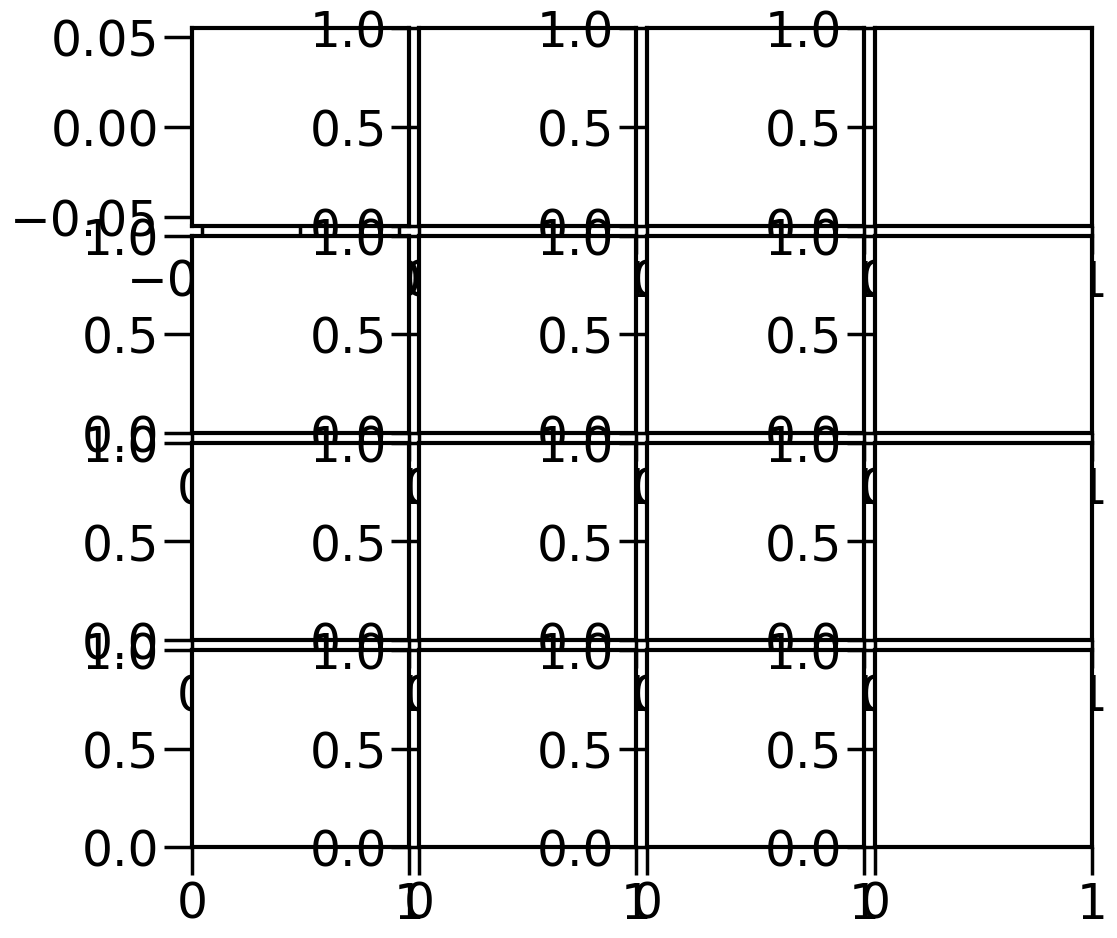

In [15]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['cov_p_inv'],1:f_nz_all['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI'})
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

In [ ]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['prior']['cov_p_inv'],1:f_nz_all['prior']['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI'})
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

In [ ]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['cov_p_inv'],1:f_nz_all['cov_p_inv'],
                            2:f_nz_all_lsst['prior']['cov_p_inv'],3:f_nz_all['prior']['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params'],
                         2:f_nz_all_lsst['params'],3:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI',
                                   2:'LSST+p(z) prior',3:'LSST+DESI+p(z) prior'},
                   print_par_error=False)
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

In [ ]:
f_nz_all_lsst['model_deriv']['nz_s_0_17']